Problem Description
Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need
to figure out the accuracy of your model and use that to predict different samples in your test
dataset. In iris dataset there are 150 samples containing following features,
1. Sepal Length
2. Sepal Width
3. Petal length
4. Petal width
Using above 4 features you will classify a flower in one of the three categories,
1. Setosa
2. Versicolour
3. Virginica


In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,confusion_matrix,f1_score,classification_report,silhouette_score
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [94]:
iris = load_iris()
print("Dir : ",dir(iris))
print("Feature_names : ",iris.feature_names)
print("Target_names  : ",iris.target_names)
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Category'] = iris.target

df.sample(5)

Dir :  ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
Feature_names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target_names  :  ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Category
50,7.0,3.2,4.7,1.4,1
18,5.7,3.8,1.7,0.3,0
61,5.9,3.0,4.2,1.5,1
14,5.8,4.0,1.2,0.2,0
86,6.7,3.1,4.7,1.5,1


In [95]:
print("The shape of this dataset is ",df.shape)

The shape of this dataset is  (150, 5)


In [96]:
print("No. of elements in this dataset is ",df.size)

No. of elements in this dataset is  750


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Category           150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


# Data Cleaning

In [98]:
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Category
142,5.8,2.7,5.1,1.9,2


In [99]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Category


# Splitting the dataset

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(df[iris.feature_names],df["Category"], test_size=0.2)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 119 samples in the training set and 30 samples in the test set


# Different types of Classification Models

# 1 - Logistic regression model

In [101]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, Y_train)
LRmodel_Pred = LRmodel.predict(X_test)
print("Train Score : ",LRmodel.score(X_train,Y_train))
print("Score : ",LRmodel.score(X_test,Y_test))
print("Accuracy_score : ",accuracy_score(Y_test, LRmodel_Pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, LRmodel_Pred))
print('F1 score : ', f1_score(Y_test, LRmodel_Pred, average='macro'))
print('Classification Report : \n', classification_report(Y_test, LRmodel_Pred))


Train Score :  0.9663865546218487
Score :  0.9666666666666667
Accuracy_score :  0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
F1 score :  0.9665831244778613
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# 2 - Decision Tree Classifier Model

In [102]:
from sklearn.tree import DecisionTreeClassifier

DTmodel = DecisionTreeClassifier()
DTmodel.fit(X_train,Y_train)
DTmodel_Pred = DTmodel.predict(X_test)
print("Train Score : ",DTmodel.score(X_train,Y_train))
print("Score : ",DTmodel.score(X_test,Y_test))
print("Accuracy_score : ",accuracy_score(Y_test, DTmodel_Pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, DTmodel_Pred))
print('F1 score : ', f1_score(Y_test, DTmodel_Pred, average='macro'))
print('Classification Report : \n', classification_report(Y_test, DTmodel_Pred))


Train Score :  1.0
Score :  0.9
Accuracy_score :  0.9
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  3  7]]
F1 score :  0.8976982097186701
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.77      1.00      0.87        10
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



# Hyper Parameter tuning of Decision Tree Classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier

parameter={
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[3,4,5,6,7,8,9,10],
    'max_features':['auto','sqrt','log2'],
    'splitter':['best', 'random']
}

DTmodel = DecisionTreeClassifier()

cv=GridSearchCV(DTmodel,parameter,scoring='accuracy')
cv.fit(X_train,Y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",cv.best_estimator_)
print("\n The best score across ALL searched params:\n",cv.best_score_)
print("\n The best parameters across ALL searched params:\n",cv.best_params_)

cv_model=cv.best_estimator_
DTmodel.fit(X_train, Y_train)
DTmodel_Pred = cv_model.predict(X_test)

print("\nScore : ",cv_model.score(X_test,Y_test))
print("Accuracy_score : ",accuracy_score(Y_test, DTmodel_Pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, DTmodel_Pred))
print('F1 score : ', f1_score(Y_test, DTmodel_Pred, average='macro'))
print('Classification Report : \n', classification_report(Y_test, DTmodel_Pred))


 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(criterion='log_loss', max_depth=8, max_features='log2',
                       splitter='random')

 The best score across ALL searched params:
 0.975

 The best parameters across ALL searched params:
 {'criterion': 'log_loss', 'max_depth': 8, 'max_features': 'log2', 'splitter': 'random'}

Score :  0.9333333333333333
Accuracy_score :  0.9333333333333333
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
F1 score :  0.9333333333333332
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

# 3 - Random Forest Classifier Model

In [104]:
from sklearn.ensemble import RandomForestClassifier 


RFCmodel = RandomForestClassifier()


RFCmodel.fit(X_train, Y_train)
RFCmodel_Pred = RFCmodel.predict(X_test)

print("Train Score : ",RFCmodel.score(X_train,Y_train))
print("Score : ",RFCmodel.score(X_test,Y_test))
print("Accuracy_score : ",accuracy_score(Y_test, RFCmodel_Pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, RFCmodel_Pred))
print('F1 score : ', f1_score(Y_test, RFCmodel_Pred, average='macro'))
print('Classification Report : \n', classification_report(Y_test, RFCmodel_Pred))


Train Score :  1.0
Score :  0.9
Accuracy_score :  0.9
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  3  7]]
F1 score :  0.8976982097186701
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.77      1.00      0.87        10
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



# Hyper Parameter tuning of Random Forest Classifier 

In [105]:
from sklearn.ensemble import RandomForestClassifier 

parameter={
    'n_estimators':[10,50,100],
    'criterion':['gini','entropy','log_loss'],
    'max_depth':np.arange(2,10,2),
    'max_features':[None,'sqrt','log2'],
    "bootstrap": [True, False]
    
}

RFCmodel = RandomForestClassifier()

cv=GridSearchCV(RFCmodel,parameter,scoring='accuracy')
cv.fit(X_train,Y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",cv.best_estimator_)
print("\n The best score across ALL searched params:\n",cv.best_score_)
print("\n The best parameters across ALL searched params:\n",cv.best_params_)

cv_model=cv.best_estimator_
cv_model.fit(X_train, Y_train)
RFCmodel_Pred = cv_model.predict(X_test)


print("Score : ",cv_model.score(X_test,Y_test))
print("Accuracy_score : ",accuracy_score(Y_test, RFCmodel_Pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, RFCmodel_Pred))
print('F1 score : ', f1_score(Y_test, RFCmodel_Pred, average='macro'))
print('Classification Report : \n', classification_report(Y_test, RFCmodel_Pred))


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=2, max_features=None, n_estimators=10)

 The best score across ALL searched params:
 0.9666666666666668

 The best parameters across ALL searched params:
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'n_estimators': 10}
Score :  0.9
Accuracy_score :  0.9
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  3  7]]
F1 score :  0.8976982097186701
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.77      1.00      0.87        10
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



# 4 - Ada Boost Classifier Model

In [106]:
from sklearn.ensemble import AdaBoostClassifier 
AdaBCmodel = AdaBoostClassifier()
AdaBCmodel.fit(X_train, Y_train)
AdaBCmodel_Pred = AdaBCmodel.predict(X_test)
print("Train Score : ",AdaBCmodel.score(X_train,Y_train))
print("Score : ",AdaBCmodel.score(X_test,Y_test))
print("Accuracy_score : ",accuracy_score(Y_test, AdaBCmodel_Pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, AdaBCmodel_Pred))
print('F1 score : ', f1_score(Y_test, AdaBCmodel_Pred, average='macro'))
print('Classification Report : \n', classification_report(Y_test, AdaBCmodel_Pred))


Train Score :  0.9747899159663865
Score :  0.9
Accuracy_score :  0.9
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  3  7]]
F1 score :  0.8976982097186701
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.77      1.00      0.87        10
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



# 5 - Gradient Boosting Classifier Model

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
GBCmodel = GradientBoostingClassifier()
GBCmodel.fit(X_train, Y_train)
GBCmodel_Pred = GBCmodel.predict(X_test)
print("Train Score : ",GBCmodel.score(X_train,Y_train))
print("Score : ",GBCmodel.score(X_test,Y_test))
print("Accuracy_score : ",accuracy_score(Y_test, GBCmodel_Pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, GBCmodel_Pred))
print('F1 score : ', f1_score(Y_test, GBCmodel_Pred, average='macro'))
print('Classification Report : \n', classification_report(Y_test, GBCmodel_Pred))


Train Score :  1.0
Score :  0.9
Accuracy_score :  0.9
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  3  7]]
F1 score :  0.8976982097186701
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.77      1.00      0.87        10
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



# 6 - XGB Classifier Model

In [108]:
import xgboost as xgb
XGBmodel = xgb.XGBClassifier()
XGBmodel.fit(X_train, Y_train)
XGBmodel_Pred = XGBmodel.predict(X_test)
print("Train Score : ",XGBmodel.score(X_train,Y_train))
print(" Test Score : ",XGBmodel.score(X_test,Y_test))
print("Accuracy_score : ",accuracy_score(Y_test, XGBmodel_Pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, XGBmodel_Pred))
print('F1 score : ', f1_score(Y_test, XGBmodel_Pred, average='macro'))
print('Classification Report : \n', classification_report(Y_test, XGBmodel_Pred))


Train Score :  1.0
 Test Score :  0.9
Accuracy_score :  0.9
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  3  7]]
F1 score :  0.8976982097186701
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.77      1.00      0.87        10
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



# 7 - SVC Model

In [109]:
from sklearn.svm import SVC 
SVCmodel = SVC()
SVCmodel.fit(X_train, Y_train)
SVCmodel_Pred = SVCmodel.predict(X_test)
print("Train Score : ",SVCmodel.score(X_train,Y_train))
print("Test Score : ",SVCmodel.score(X_test,Y_test))
#print("Accuracy_score : ",SVCmodel_Pred(Y_test, SVCmodel_Pred,average='macro'))
#print('Confusion Matrix:\n', SVCmodel_Pred(Y_test, LRmodel_Pred))
print('F1 score : ', f1_score(Y_test, SVCmodel_Pred, average='macro'))
print('Classification Report : \n', classification_report(Y_test, SVCmodel_Pred))


Train Score :  0.957983193277311
Test Score :  0.9666666666666667
F1 score :  0.9665831244778613
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Hyper Parameter tuning of Support Vector Classifier 

In [110]:
parameter = {
    'C': [0.1, 1, 3, 10],          
    'gamma': [0.001, 0.01, 0.1],
    'degree': [2, 3, 4, 5],
    'kernel': ['linear','poly','rbf','sigmoid']
}



cv=GridSearchCV(SVCmodel,parameter,scoring='accuracy')
cv.fit(X_train,Y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",cv.best_estimator_)
print("\n The best score across ALL searched params:\n",cv.best_score_)
print("\n The best parameters across ALL searched params:\n",cv.best_params_)

cv_model=cv.best_estimator_
cv_model.fit(X_train, Y_train)
SVCmodel_Pred = cv_model.predict(X_test)


print("Score : ",cv_model.score(X_test,Y_test))
#print("Accuracy_score : ",accuracy_score(Y_test, SVCmodel_Pred))
#print('Confusion Matrix:\n', confusion_matrix(Y_test, SVCmodel_Pred))
print('F1 score : ', f1_score(Y_test, SVCmodel_Pred, average='macro'))
print('Classification Report : \n', classification_report(Y_test, SVCmodel_Pred))


 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=10, gamma=0.1, kernel='poly')

 The best score across ALL searched params:
 0.9916666666666668

 The best parameters across ALL searched params:
 {'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Score :  0.8666666666666667
F1 score :  0.8653198653198654
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      0.90      0.82        10
           2       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30



# 8 - KNeighbors Classifier Model

In [111]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier()
KNNmodel.fit(X_train, Y_train)
KNNmodel_Pred = KNNmodel.predict(X_test)
print("Train Score : ",KNNmodel.score(X_train,Y_train))
print("Test Score : ",KNNmodel.score(X_test,Y_test))
print("Accuracy_score : ",accuracy_score(Y_test, KNNmodel_Pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, KNNmodel_Pred))
print('F1 score : ', f1_score(Y_test, KNNmodel_Pred, average='macro'))
print('Classification Report : \n', classification_report(Y_test, KNNmodel_Pred))


Train Score :  0.9663865546218487
Test Score :  1.0
Accuracy_score :  1.0
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
F1 score :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Hyper Parameter tuning of KNeighbors Classifier

In [112]:
parameter={
    'n_neighbors': [3, 5, 7, 9, 11], 
    'weights': ['uniform', 'distance',None],  
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
    
}


KNNmodel = KNeighborsClassifier()

cv=GridSearchCV(KNNmodel,parameter,scoring='accuracy')
cv.fit(X_train,Y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",cv.best_estimator_)
print("\n The best score across ALL searched params:\n",cv.best_score_)
print("\n The best parameters across ALL searched params:\n",cv.best_params_)

cv_model=cv.best_estimator_
cv_model.fit(X_train, Y_train)
KNNmodel_Pred = cv_model.predict(X_test)



print("Score : ",cv_model.score(X_test,Y_test))
print("Accuracy_score : ",accuracy_score(Y_test, KNNmodel_Pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, KNNmodel_Pred))
print('F1 score : ', f1_score(Y_test, KNNmodel_Pred, average='macro'))
print(' Classification Report : \n', classification_report(Y_test, KNNmodel_Pred))

 Results from Grid Search 

 The best estimator across ALL searched params:
 KNeighborsClassifier()

 The best score across ALL searched params:
 0.9666666666666668

 The best parameters across ALL searched params:
 {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Score :  1.0
Accuracy_score :  1.0
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
F1 score :  1.0
 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 9 - Naive Bayes

In [113]:
from sklearn.naive_bayes import GaussianNB
NBCModel = GaussianNB()
NBCModel.fit(X_train, Y_train)
y_pred = NBCModel.predict(X_test)
#print(y_pred)
#print(Y_test)
mislabel = np.sum(Y_test != y_pred)
print("Total no of mislabelled datapoints :",mislabel)

print("Score : ",NBCModel.score(X_test,Y_test))
print("Accuracy_score : ",accuracy_score(Y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, y_pred))
print('F1 score : ', f1_score(Y_test, y_pred, average='macro'))
print(' Classification Report : \n',classification_report(y_pred, Y_test))

Total no of mislabelled datapoints : 2
Score :  0.9333333333333333
Accuracy_score :  0.9333333333333333
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
F1 score :  0.9326599326599326
 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.83      0.91        12
           2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



# Unsupervised

In [127]:

X=iris.data


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 0.22              0.62               0.07              0.04   
1                 0.17              0.42               0.07              0.04   
2                 0.11              0.50               0.05              0.04   
3                 0.08              0.46               0.08              0.04   
4                 0.19              0.67               0.07              0.04   
..                 ...               ...                ...               ...   
145               0.67              0.42               0.71              0.92   
146               0.56              0.21               0.68              0.75   
147               0.61              0.42               0.71              0.79   
148               0.53              0.58               0.75              0.92   
149               0.44              0.42               0.69              0.71   

     Category  
0         0

# KMeans

C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

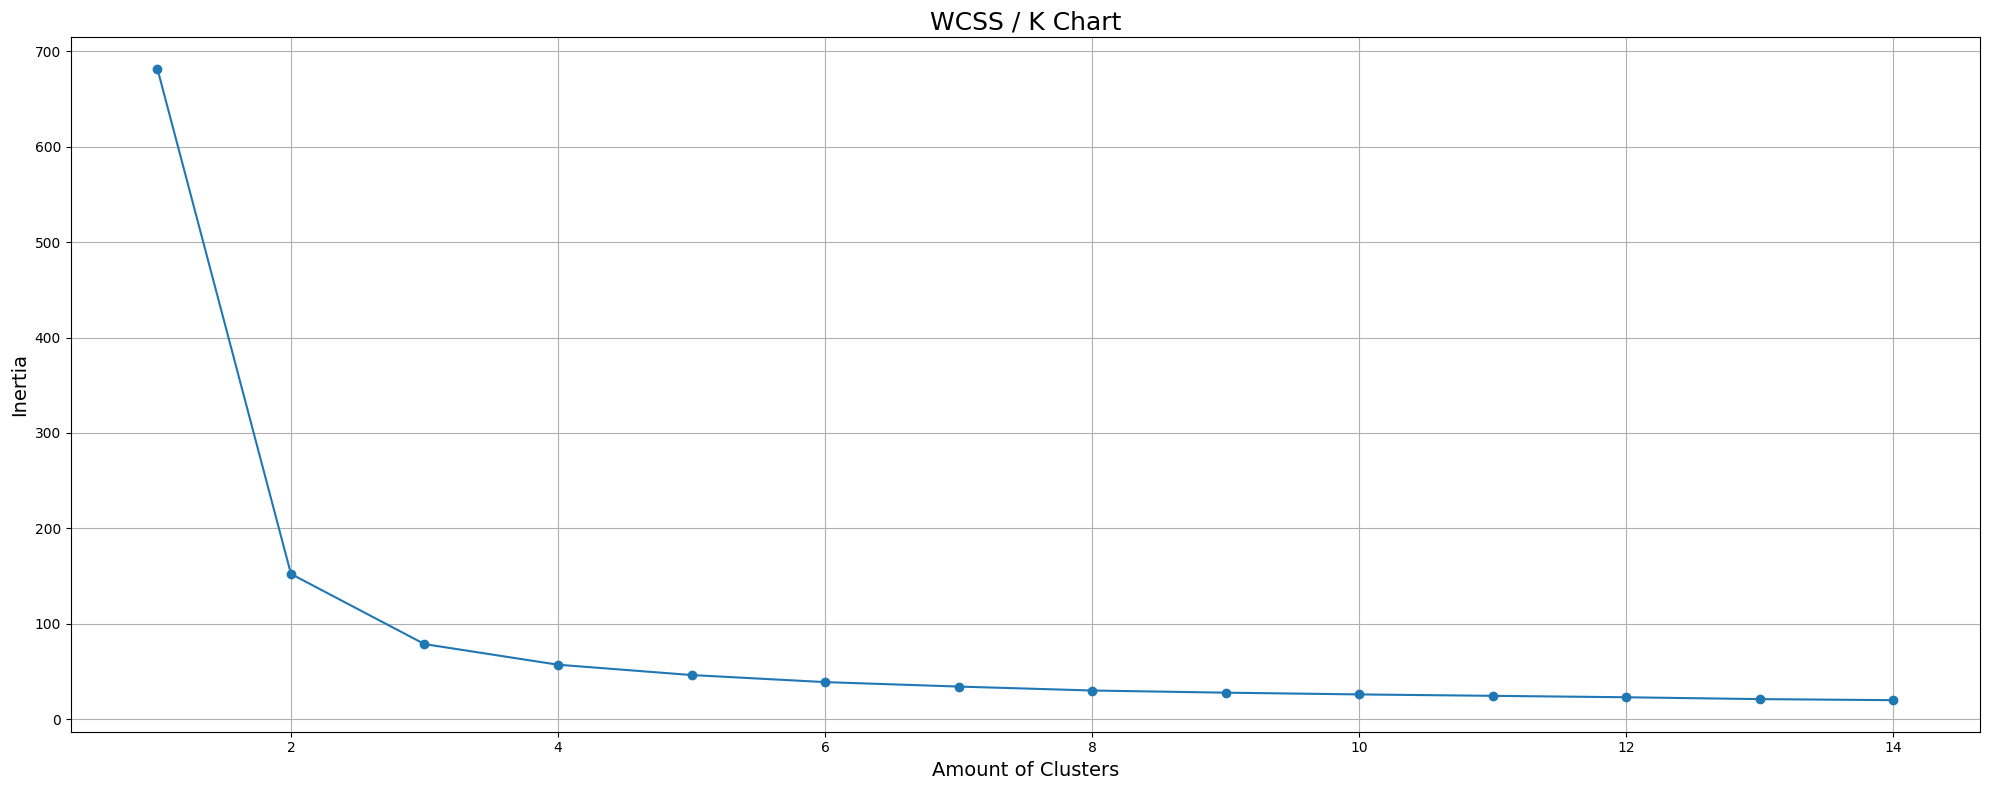

In [115]:
from sklearn.cluster import KMeans

wcss = []
#WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)

plt.tight_layout()
plt.show()


In [116]:
kmeans = KMeans(n_clusters=2)
kmeans_pred = kmeans.fit_predict(X)
print(kmeans_pred)

silhouette_score(X, kmeans_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.6810461692117462

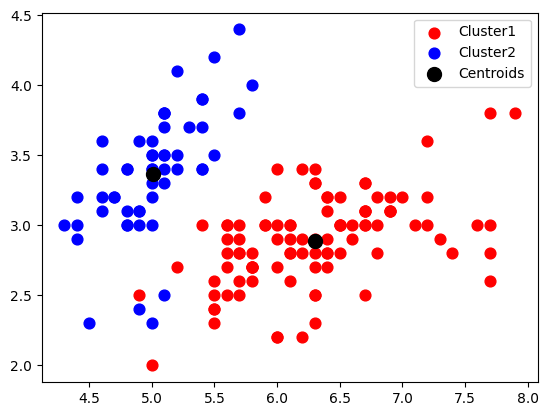

In [117]:
plt.scatter(X[kmeans_pred == 0, 0], X[kmeans_pred == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[kmeans_pred == 1, 0], X[kmeans_pred == 1, 1], s = 60, c = 'blue', label = 'Cluster2')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

plt.legend() 

plt.show()

In [118]:
kmeans = KMeans(n_clusters=3)
kmeans_pred = kmeans.fit_predict(X)
print(kmeans_pred)

silhouette_score(X, kmeans_pred)

#The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
#Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.5528190123564095

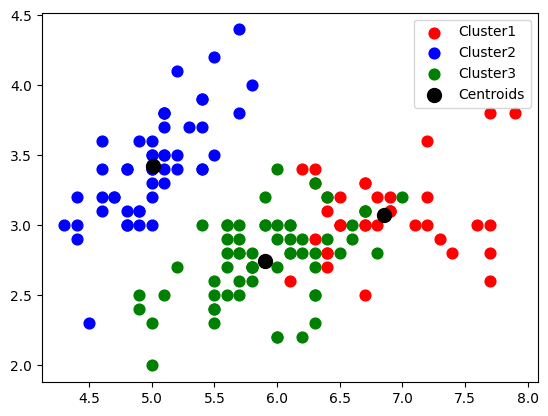

In [119]:
plt.scatter(X[kmeans_pred == 0, 0], X[kmeans_pred == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[kmeans_pred == 1, 0], X[kmeans_pred == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[kmeans_pred == 2, 0], X[kmeans_pred == 2, 1], s = 60, c = 'green', label = 'Cluster3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

plt.legend() 

plt.show()

# Hierarchical Clustering

In [120]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
hc_pred = hc.fit_predict(X)
hc_pred

silhouette_score(X, hc_pred)

C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.6867350732769777

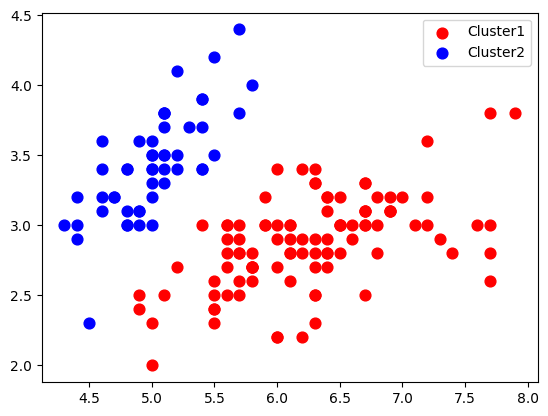

In [121]:
plt.scatter(X[hc_pred == 0, 0], X[hc_pred == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[hc_pred == 1, 0], X[hc_pred == 1, 1], s = 60, c = 'blue', label = 'Cluster2')


plt.legend() 

plt.show()

# TSNE

In [135]:
print(df)

col=df.columns

from sklearn.preprocessing import MinMaxScaler


# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Print the scaled data

df[col]=scaled_data.round(2)
df

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 0.22              0.62               0.07              0.04   
1                 0.17              0.42               0.07              0.04   
2                 0.11              0.50               0.05              0.04   
3                 0.08              0.46               0.08              0.04   
4                 0.19              0.67               0.07              0.04   
..                 ...               ...                ...               ...   
145               0.67              0.42               0.71              0.92   
146               0.56              0.21               0.68              0.75   
147               0.61              0.42               0.71              0.79   
148               0.53              0.58               0.75              0.92   
149               0.44              0.42               0.69              0.71   

     Category  
0         0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Category
0,0.22,0.62,0.07,0.04,0.0
1,0.17,0.42,0.07,0.04,0.0
2,0.11,0.50,0.05,0.04,0.0
3,0.08,0.46,0.08,0.04,0.0
4,0.19,0.67,0.07,0.04,0.0
...,...,...,...,...,...
145,0.67,0.42,0.71,0.92,1.0
146,0.56,0.21,0.68,0.75,1.0
147,0.61,0.42,0.71,0.79,1.0
148,0.53,0.58,0.75,0.92,1.0


In [141]:
#Apply the TSNE algorithm with random state = 1
for i in range(10,50):
    tsne = TSNE(n_components = 2, random_state=1,perplexity=i)  
    data_tsne = tsne.fit_transform(scaled_data)

#Fit and transform tsne function on the scaled data
data_tsne.shape

(149, 2)

Before applying tsne the shape of the dataset is (149,5). After applying tsne the shape of the dataset is (149,2).We reduced the dimensionality of the dataset using tsne. So we can easily visualize our high dimensional dataset in 2d or 1d.

# 2 dimensional

<Axes: >

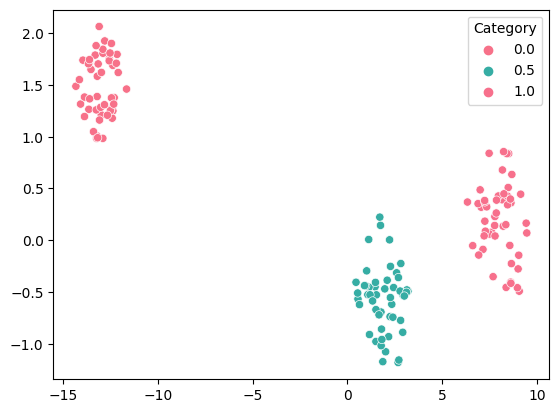

In [139]:
sns.scatterplot(x=data_tsne[:,0],y=data_tsne[:,1],hue="Category", palette='husl',data=df)
#plt.scatter(data_tsne[:,0],data_tsne[:,1], s = 60, c = 'red')
#plt.show()

In [142]:
#Apply the TSNE algorithm with random state = 1
for i in range(10,50):
    tsne = TSNE(n_components = 1, random_state=1,perplexity=i)  
    data_tsne = tsne.fit_transform(scaled_data)

#Fit and transform tsne function on the scaled data
data_tsne.shape

(149, 1)

# 1 dimensional

<Axes: >

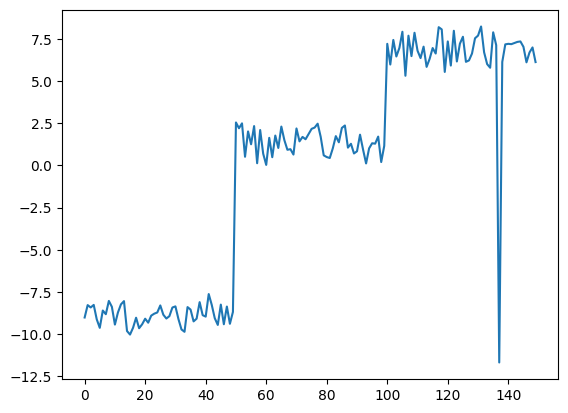

In [143]:
sns.lineplot(x=df.index, y=data_tsne[:,0], data=df)